## MA981: Dissertation on Modeling Car Emissions Using Machine Learning


This notebook contains python code for the modeling of CO2 emissions. Initially multiple fuel vehicle based datasets are combined into single dataframe to perform analysis. Handled missing values, categorical columns are transformed into numerical values for modeling. Various machine learning models were utilized and their Root Mean Square Error(RMSE), Mean Square Error(MSE), R-Squared(R^2) were assessed.

In [1]:
!pip install tabulate
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder


from tabulate import tabulate
# Ignore all warnings
warnings.filterwarnings('ignore')

# Path that contains csv files
folder_path = 'C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Vehicle info\\Fuel vehicles'

# Find csv files in a folder and add to a list
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Initialize an empty list 
data_frames = []

# Iterate through all the csv files and combine all the files into a single dataframe
for file in csv_files:
    try:
        #  Read the CSV file using the 'latin-1' encoding
        df = pd.read_csv(file, encoding='latin-1')
    except UnicodeDecodeError as e:
        # In case of UnicodeDecodeError occurs, print the error and the corresponding file's name
        print(f"UnicodeDecodeError: {e} for file: {file}")
        # Handle error by skipping problematic file or using another encoding
        continue
    data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
fv_data = pd.concat(data_frames, ignore_index=True)




In [2]:
import pandas as pd

# Write combined dataframe to a csv file in specified path
fv_data.to_csv('C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Combined Fuel Vehicle dataset\\fv_data.csv', index=False)


In [105]:

# Get data types of each column
data_types = fv_data.dtypes

# Get the count of null values for each column
null_values = fv_data.isnull().sum()

# Combine the data types and null values into a single DataFrame
data_description = pd.DataFrame({'Data Type': data_types, 'Null Values': null_values})

# Display the description in a table format
print(data_description)


                     Data Type  Null Values
Model year               int64            0
Make                    object            0
Model                   object            0
Vehicle class           object            0
Engine size (L)        float64            0
Cylinders                int64            0
Transmission            object            0
Fuel type               object            0
City (L/100 km)        float64            0
Highway (L/100 km)     float64            0
Combined (L/100 km)    float64            0
Combined (mpg)           int64            0
CO2 emissions (g/km)     int64            0
CO2 rating             float64        11689
Smog rating            float64        12795


In [106]:

# Get data types of each column
data_types = fv_data.dtypes

# Get the count of null values for each column
null_values = fv_data.isnull().sum()

# Combine the data types and null values into a single DataFrame
data_description = pd.DataFrame({'Data Type': data_types, 'Null Values': null_values})



In [107]:
# Select numeric columns from fv_data dataframe
numeric_columns=fv_data[['Engine size (L)', 'Cylinders', 'City (L/100 km)', 'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)', 'CO2 emissions (g/km)','CO2 rating','Smog rating']]

# Display summary statistics for the numeric columns
summary_stats = numeric_columns.describe()

# Transpose the DataFrame 
summary_stats_transposed = summary_stats.T

# Display the summary statistics in a table format
display(summary_stats_transposed)



,count,mean,std,min,25%,50%,75%,max
Engine size (L),20510.0,3.339103,1.353446,0.8,2.2,3.0,4.0,8.4
Cylinders,20510.0,5.826426,1.869976,2.0,4.0,6.0,8.0,16.0
City (L/100 km),20510.0,13.435768,3.779841,4.0,10.8,13.0,15.5,30.6
Highway (L/100 km),20510.0,9.714276,2.520023,3.9,8.0,9.3,11.0,22.1
Combined (L/100 km),20510.0,11.761121,3.175759,4.0,9.6,11.3,13.4,26.1
Combined (mpg),20510.0,25.745831,7.024965,11.0,21.0,25.0,29.0,71.0
CO2 emissions (g/km),20510.0,266.779912,63.495227,94.0,221.0,262.0,304.0,608.0
CO2 rating,8821.0,4.627253,1.580580,1.0,4.0,5.0,6.0,10.0
Smog rating,7715.0,4.824887,1.785794,1.0,3.0,5.0,6.0,8.0


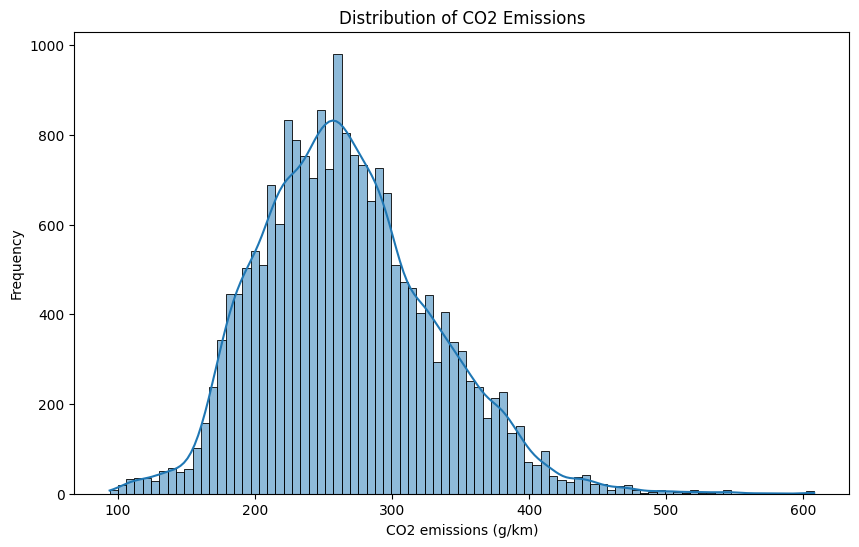

In [95]:

# Distribution plot of CO2 Emissionsabs

# Adjust the figure dimensions
plt.figure(figsize=(10, 6))
sns.histplot(fv_data['CO2 emissions (g/km)'], kde=True)

# Assign the title and labels for the plot
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 emissions (g/km)')
plt.ylabel('Frequency')

# Save the figure in specified path
plt.savefig("C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\C02 Emission Distribution.png", dpi=400)

# Display the plot
plt.show()


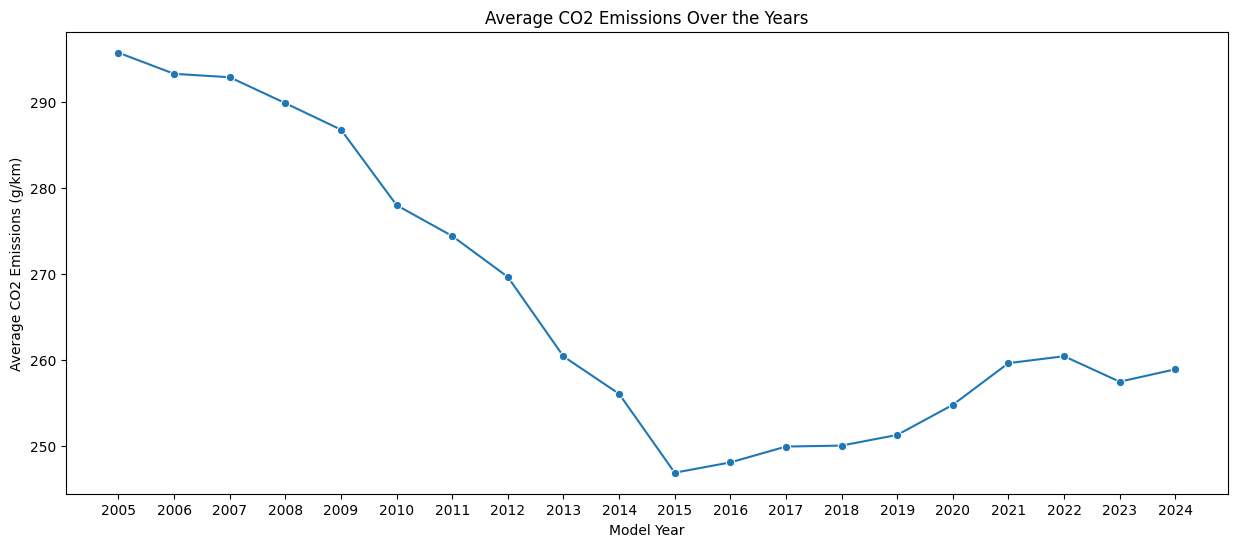

In [96]:
# Compute average CO2 emissions for each year 
avg_co2_by_year = fv_data.groupby('Model year')['CO2 emissions (g/km)'].mean().reset_index()

# Adjust the figure dimensions
plt.figure(figsize=(15, 6))
sns.lineplot(x='Model year', y='CO2 emissions (g/km)', data=avg_co2_by_year, marker='o')

# Assign the title and labels for the plot
plt.title('Average CO2 Emissions Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Average CO2 Emissions (g/km)')

# Model years to be displayed in x-axis
years = avg_co2_by_year['Model year'].astype(int).unique()
plt.xticks(ticks=years, labels=years)


# Save the figure in specified path
plt.savefig("C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\AvgCO2OverYears.png", dpi=400)

# Display the plot
plt.show()


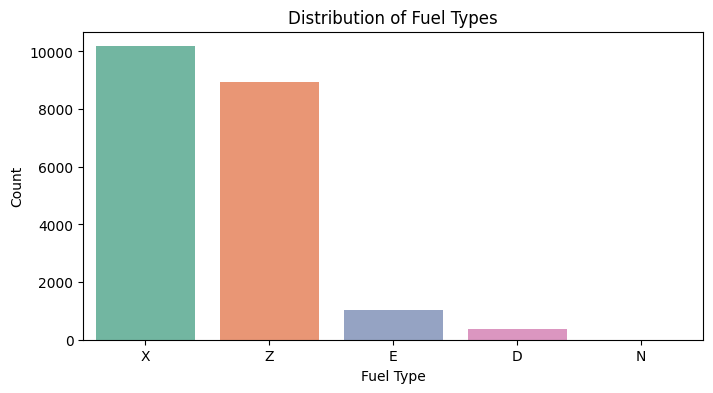

In [97]:
# Distribution plot of fuel types used in vehicles

# Adjust the figure dimensions
plt.figure(figsize=(8, 4))
sns.countplot(x='Fuel type', data=fv_data, palette='Set2')  

# Assign the title and labels for the plot
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

# Save the figure in specified path
plt.savefig("C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\FuelTypeDistribution.png", dpi=400)

# Display the plot
plt.show()


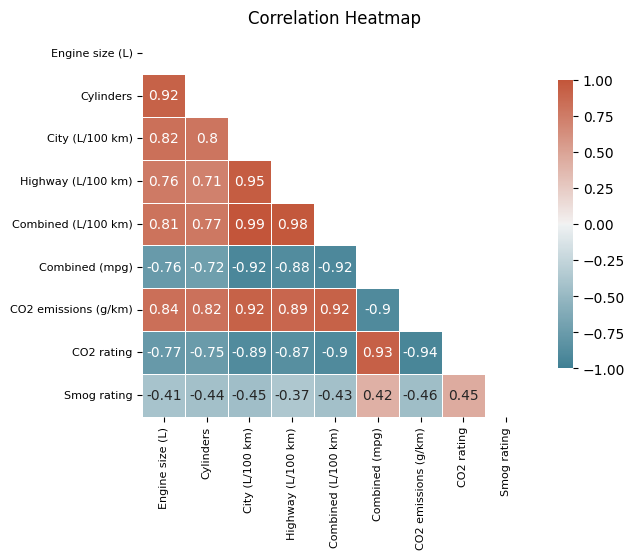

In [98]:
# Plot the correlation heatmap

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a mask for the upper triangle (excluding the diagonal as it contains same information as lower displayed triangle)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Adjust the figure dimensions    
plt.figure(figsize=(8, 5))

# Create a color palette for visualizations
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a heatmap to visualize the correlation matrix
heatmap=sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot_kws={"size": 10})

# Adjust tick label font size
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)

# Assign the title for the heatmap
plt.title('Correlation Heatmap')

# Save the figure in specified path
plt.savefig("C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\CorrHeatmap.png", dpi=200)

# Display the plot
plt.show()

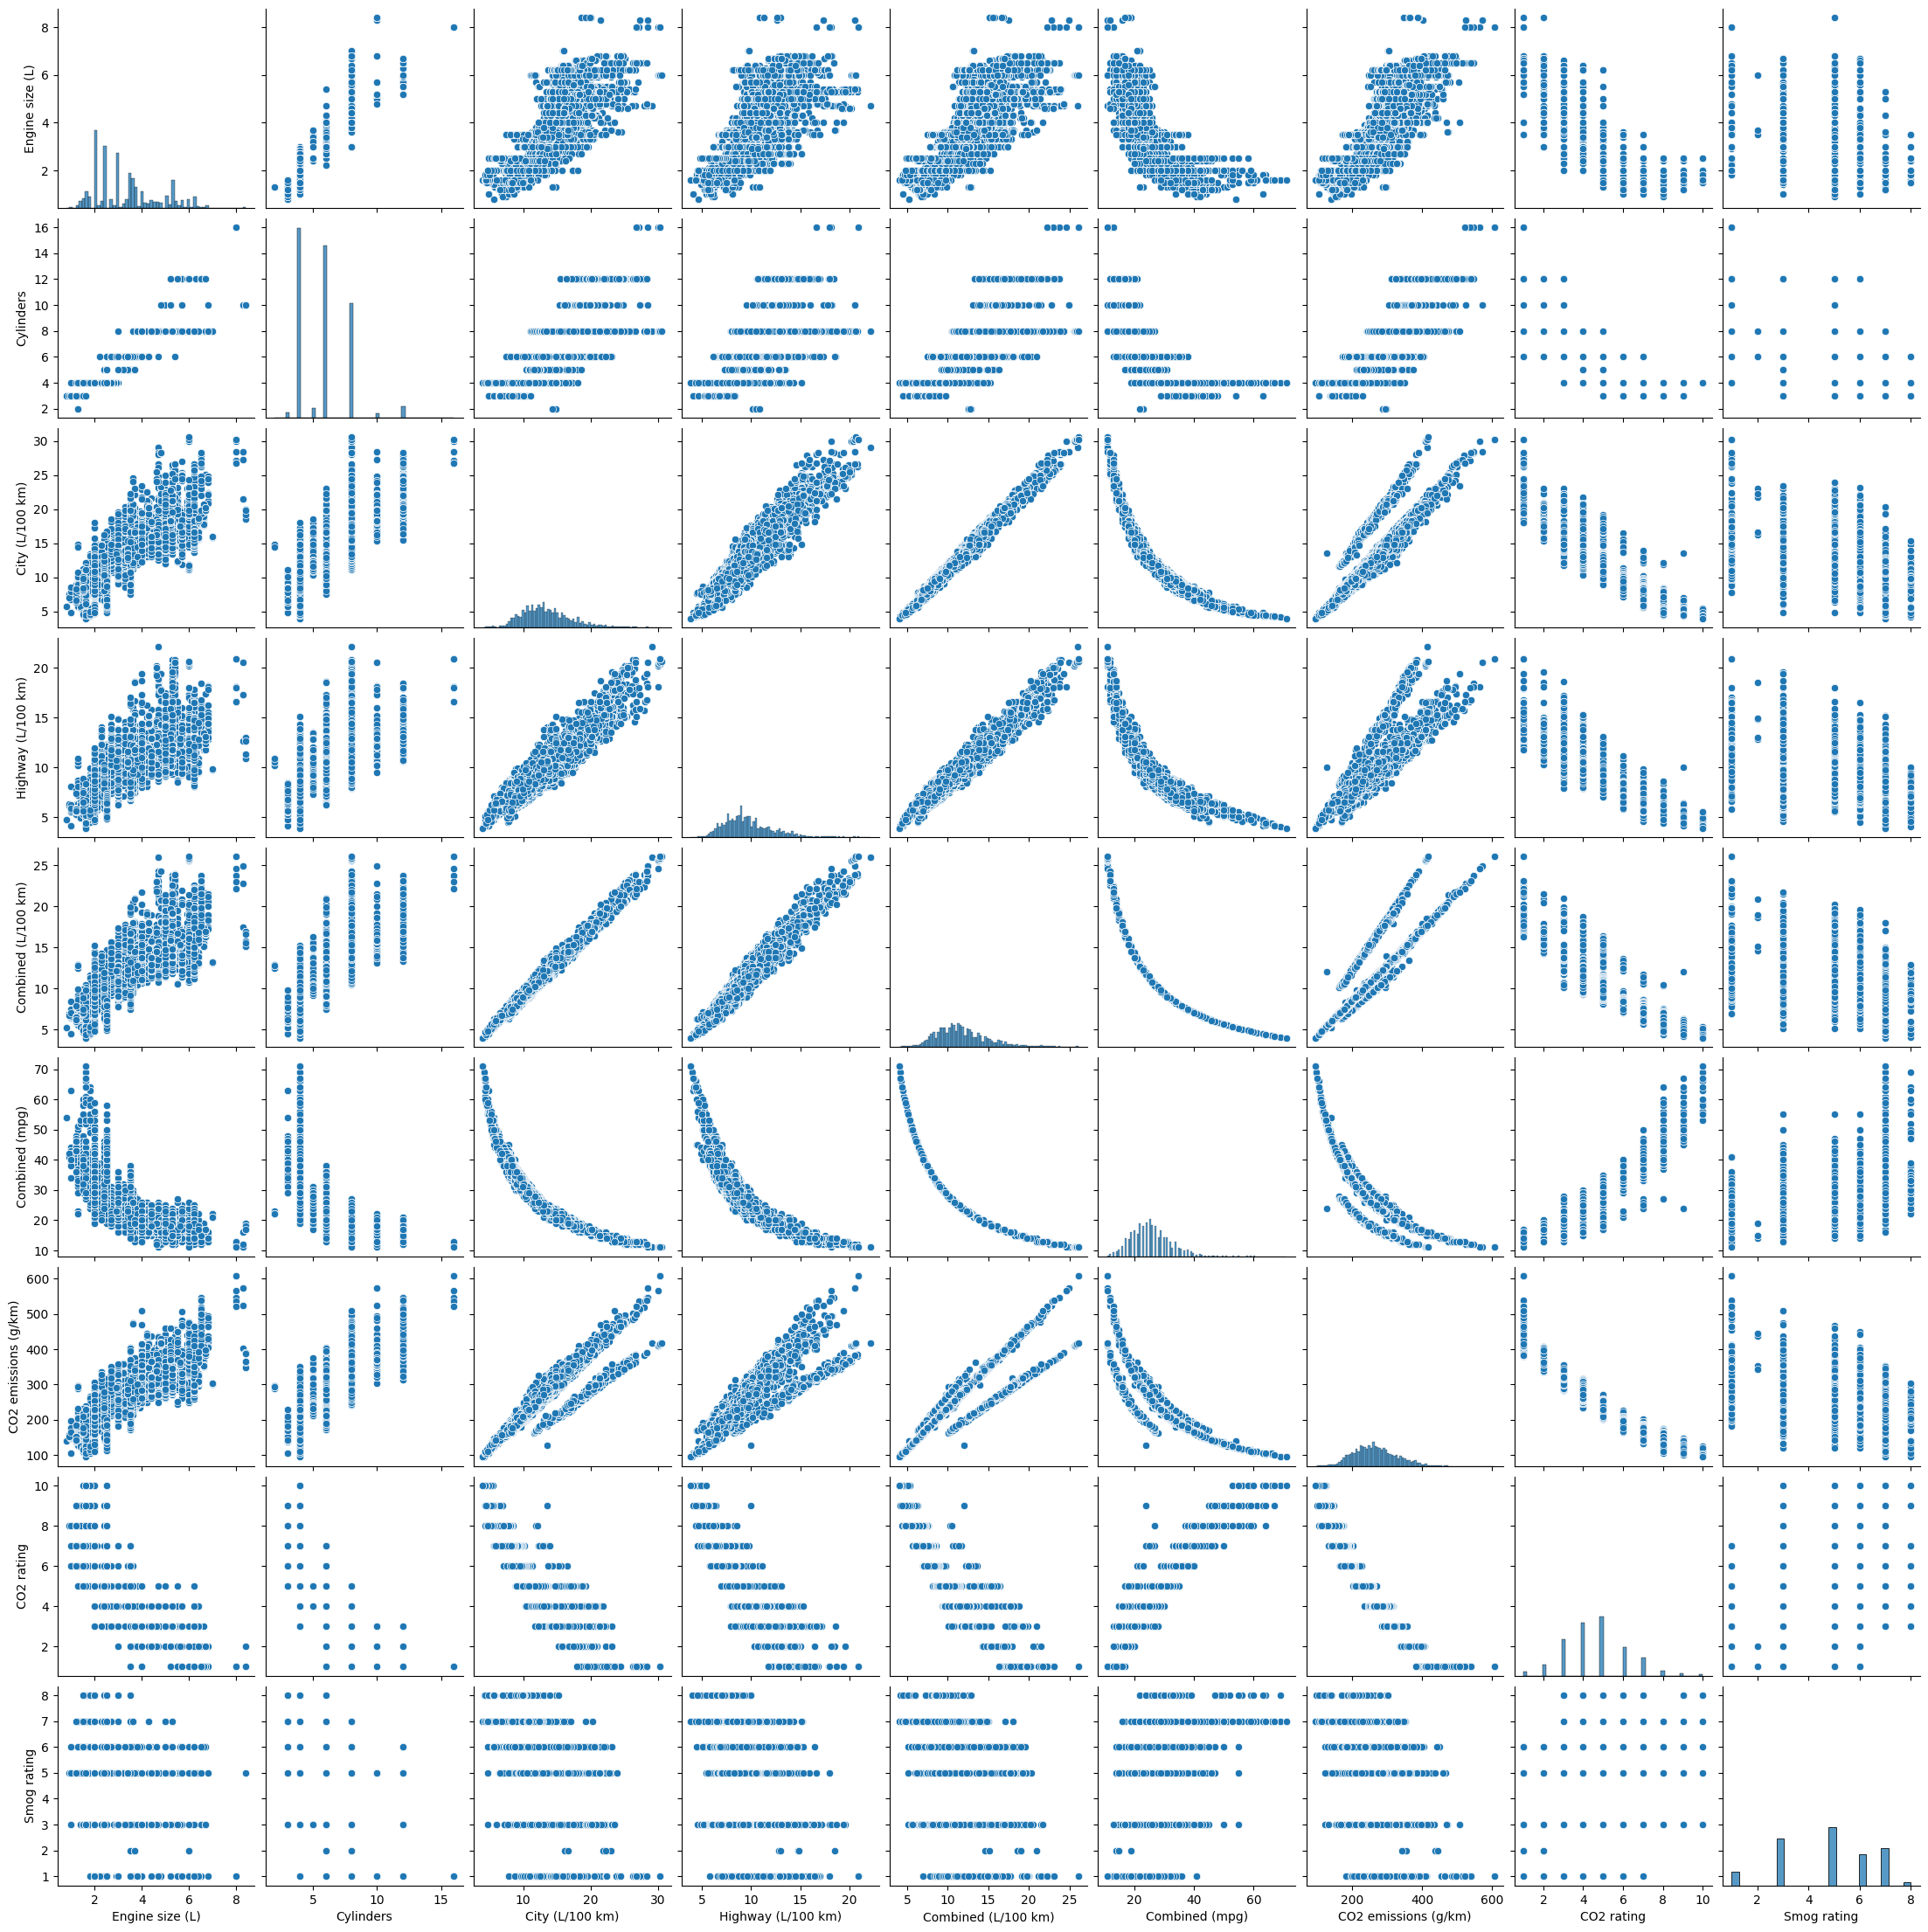

In [99]:
# Pairplot to find relationships between numerical variables
sns.pairplot(fv_data[['Engine size (L)', 'Cylinders', 'City (L/100 km)', 'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)', 'CO2 emissions (g/km)','CO2 rating','Smog rating']])

# Save the figure in specified path
plt.savefig("C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\PairPlot.png", dpi=400)

# Display the plot
plt.show()

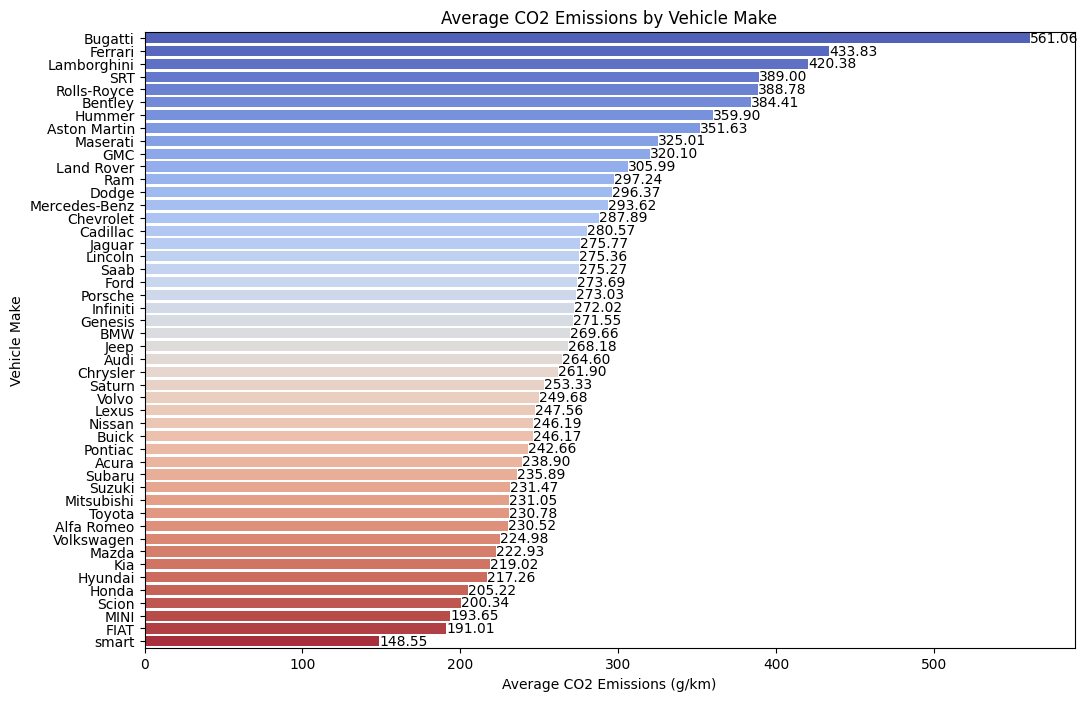

In [108]:
# Average CO2 Emissions by Each Vehicle Make
avg_co2_by_make = fv_data.groupby('Make')['CO2 emissions (g/km)'].mean().reset_index()
avg_co2_by_make = avg_co2_by_make.sort_values(by='CO2 emissions (g/km)', ascending=False)


# Adjust the figure dimensions
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='CO2 emissions (g/km)', y='Make', data=avg_co2_by_make, palette='coolwarm')


# Assign the title and labels for the plot
plt.title('Average CO2 Emissions by Vehicle Make')
plt.xlabel('Average CO2 Emissions (g/km)')
plt.ylabel('Vehicle Make')

# Show average emissions by vehicle make on each bar
for index, value in enumerate(avg_co2_by_make['CO2 emissions (g/km)']):
    plt.text(value, index, f'{value:.2f}', va='center')


# Save the figure in specified path
plt.savefig("C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\AvgCO2byMake.png", dpi=400)

# Display the plot
plt.show()


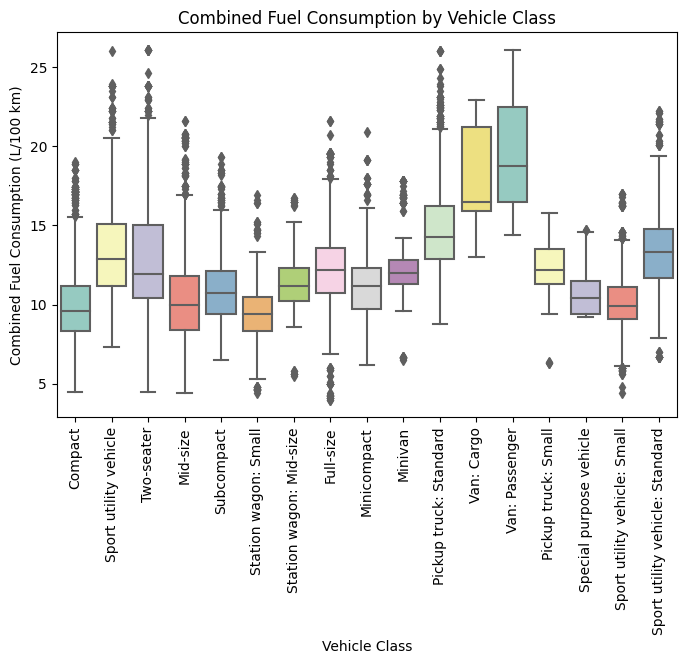

In [101]:
# Boxplot of Fuel Consumption(Combined fuel consumption L/100km) by Vehicle Class

plt.figure(figsize=(8, 5))
sns.boxplot(x='Vehicle class', y='Combined (L/100 km)', data=fv_data, palette='Set3')

# Assign the title and labels for the plot
plt.title('Combined Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Combined Fuel Consumption (L/100 km)')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)  

# Save the figure in specified path
plt.savefig('C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\FuelCosumptioByVehicleClass.png',dpi=200)

# Display the plot
plt.show()


In [109]:

# Create 'Transmission Type' column and extract first character from Transmission column
fv_data['Transmission type'] = fv_data['Transmission'].str[0]  # Extract the first character (A or M)

# Drop the Transmission column
fv_data.drop('Transmission', axis=1, inplace=True)  # Drop the original Transmission column

# Count the number of instances for fuel type 'N'
fuel_type_n_count = (fv_data['Fuel type'] == 'N').sum()
print(f"Fuel Type 'N' instances count:{fuel_type_n_count}")

# Step 2: Remove rows with fuel type 'N'
fv_data = fv_data[fv_data['Fuel type'] != 'N']



Fuel Type 'N' instances count:1


In [110]:

# Apply label encoding for 'Transmission type' column
label_encoder = LabelEncoder() 
fv_data['Transmission type'] = label_encoder.fit_transform(fv_data['Transmission type'])


In [111]:
# Perform one-hot encoding on the 'Fuel type' categorical column and store it in fv_data_1 
fv_data_1 = pd.get_dummies(fv_data, columns=['Fuel type'], drop_first=True)


In [112]:
# Display the first few rows to verify the encoded columns
fv_data_1.head(2)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Transmission type,Fuel type_E,Fuel type_X,Fuel type_Z
0,2005,Acura,1.7EL,Compact,1.7,4,9.2,7.2,8.3,34,191,NaN,NaN,0,False,True,False
1,2005,Acura,1.7EL,Compact,1.7,4,9.1,7.3,8.3,34,191,NaN,NaN,1,False,True,False


In [113]:
# Apply binary encoding on vehicle class column and store it in fv_data_3 dataframe
binary_encoder_vehicle = BinaryEncoder(cols=['Vehicle class'], drop_invariant=True)
fv_data_3 = binary_encoder_vehicle.fit_transform(fv_data_1)


In [114]:
# Display first few rows to verify encoded columns
fv_data_3.head(3)

,Model year,Make,Model,Vehicle class_0,Vehicle class_1,Vehicle class_2,Vehicle class_3,Vehicle class_4,Engine size (L),Cylinders,...,Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Transmission type,Fuel type_E,Fuel type_X,Fuel type_Z
0,2005,Acura,1.7EL,0,0,0,0,1,1.7,4,...,7.2,8.3,34,191,NaN,NaN,0,False,True,False
1,2005,Acura,1.7EL,0,0,0,0,1,1.7,4,...,7.3,8.3,34,191,NaN,NaN,1,False,True,False
2,2005,Acura,MDX AWD,0,0,0,1,0,3.5,6,...,11.1,13.7,21,315,NaN,NaN,0,False,False,True


In [115]:

bool_columns_new = fv_data_3.select_dtypes(include=['bool']).columns

# Convert all boolean columns to integers, since some of the encoded columns are in boolean 
fv_data_3[bool_columns_new] = fv_data_3[bool_columns_new].astype(int)



In [117]:
# Display the first few rows to verify the changes in boolean columns
fv_data_3.head()

,Model year,Make,Model,Vehicle class_0,Vehicle class_1,Vehicle class_2,Vehicle class_3,Vehicle class_4,Engine size (L),Cylinders,...,Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Transmission type,Fuel type_E,Fuel type_X,Fuel type_Z
0,2005,Acura,1.7EL,0,0,0,0,1,1.7,4,...,7.2,8.3,34,191,NaN,NaN,0,0,1,0
1,2005,Acura,1.7EL,0,0,0,0,1,1.7,4,...,7.3,8.3,34,191,NaN,NaN,1,0,1,0
2,2005,Acura,MDX AWD,0,0,0,1,0,3.5,6,...,11.1,13.7,21,315,NaN,NaN,0,0,0,1
3,2005,Acura,NSX,0,0,0,1,1,3.0,6,...,10.5,13.0,22,299,NaN,NaN,0,0,0,1
4,2005,Acura,NSX,0,0,0,1,1,3.2,6,...,10.5,13.0,22,299,NaN,NaN,1,0,0,1


In [118]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF (Variance Inflation Factor)
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Drop the columns that are not necessary for computing vif
columns_to_remove = ['Model year', 'Make', 'Model', 'CO2 rating', 'Smog rating','CO2 emissions (g/km)']  # Adjust this list as needed
fv_data_3_vif = fv_data_3.drop(columns=columns_to_remove)


# Calculate VIF 
vif_fv_data_3 = calculate_vif(fv_data_3_vif)
print("\nVIF for fv_data_3:")
print(vif_fv_data_3)




VIF for fv_data_3:
                Feature           VIF
0       Vehicle class_0      2.250447
1       Vehicle class_1      1.963930
2       Vehicle class_2      2.081255
3       Vehicle class_3      2.406679
4       Vehicle class_4      2.415777
5       Engine size (L)     57.008483
6             Cylinders     86.457013
7       City (L/100 km)  39275.545513
8    Highway (L/100 km)  13758.787247
9   Combined (L/100 km)  98302.408080
10       Combined (mpg)     18.918088
11    Transmission type      1.412253
12          Fuel type_E      5.009915
13          Fuel type_X     26.009857
14          Fuel type_Z     23.053226


In [119]:
# Remove 'Highway (L/100 km)', 'City (L/100 km)', and 'Cylinders' from fv_data_3
fv_data_5 = fv_data_3.drop(columns=['Highway (L/100 km)', 'City (L/100 km)', 'Cylinders'])

# Display the columns available in fv_data_5 column
print(fv_data_5.columns)

Index(['Model year', 'Make', 'Model', 'Vehicle class_0', 'Vehicle class_1',
       'Vehicle class_2', 'Vehicle class_3', 'Vehicle class_4',
       'Engine size (L)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating',
       'Transmission type', 'Fuel type_E', 'Fuel type_X', 'Fuel type_Z'],
      dtype='object')


In [120]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#  Fuel type columns are named 'Fuel type_E', 'Fuel type_X', and 'Fuel type_Z' after encoding

# Standardize the numeric features
numeric_features = ['Engine size (L)', 'Combined (L/100 km)', 'Combined (mpg)', 'Fuel type_E', 'Fuel type_X', 'Fuel type_Z']
scaler = StandardScaler()

# Scale the numeric features in fv_data_5 using the standard scaler 
fv_data_5[numeric_features] = scaler.fit_transform(fv_data_5[numeric_features])

# Apply PCA(Principal Component Analysis) to the Fuel type columns
fuel_type_columns = ['Fuel type_E', 'Fuel type_X', 'Fuel type_Z']
pca = PCA(n_components=2)  # Choose 2 components 
fuel_type_pca = pca.fit_transform(fv_data_5[fuel_type_columns])

# Create a new DataFrame to store new PCA results
pca_columns_2 = [f'PCA_{i+1}' for i in range(fuel_type_pca.shape[1])]
fuel_type_pca_df = pd.DataFrame(fuel_type_pca, columns=pca_columns_2)

# Drop the Fuel type columns from fv_data_5 and concatenate new PCA columns
fv_data_5_pca = fv_data_5.drop(columns=fuel_type_columns)
fv_data_5_pca = pd.concat([fv_data_5_pca, fuel_type_pca_df], axis=1)

# Check the explained variance ratio and understand how much variance is captured by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.62400147 0.36517162]


In [121]:
# Display the DataFrame to verify standardization and PCA
fv_data_5_pca.head(5)

,Model year,Make,Model,Vehicle class_0,Vehicle class_1,Vehicle class_2,Vehicle class_3,Vehicle class_4,Engine size (L),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Transmission type,PCA_1,PCA_2
0,2005.0,Acura,1.7EL,0.0,0.0,0.0,0.0,1.0,-1.211051,-1.089844,1.174959,191.0,NaN,NaN,0.0,-1.338936,-0.216694
1,2005.0,Acura,1.7EL,0.0,0.0,0.0,0.0,1.0,-1.211051,-1.089844,1.174959,191.0,NaN,NaN,1.0,-1.338936,-0.216694
2,2005.0,Acura,MDX AWD,0.0,0.0,0.0,1.0,0.0,0.118889,0.610540,-0.675597,315.0,NaN,NaN,0.0,1.500646,-0.284998
3,2005.0,Acura,NSX,0.0,0.0,0.0,1.0,1.0,-0.250539,0.390120,-0.533247,299.0,NaN,NaN,0.0,1.500646,-0.284998
4,2005.0,Acura,NSX,0.0,0.0,0.0,1.0,1.0,-0.102768,0.390120,-0.533247,299.0,NaN,NaN,1.0,1.500646,-0.284998


In [122]:
# Drop the specified columns
fv_data_5_pca = fv_data_5_pca.drop(columns=['Model year', 'Make', 'Model', 'CO2 rating', 'Smog rating'])



In [123]:
from sklearn.model_selection import train_test_split

# Define the target variable and predictors
X_5 = fv_data_5_pca.drop(columns=['CO2 emissions (g/km)'])  # All other columns are predictors
y_5 = fv_data_5_pca['CO2 emissions (g/km)']  # Target variable

# Split the data into training(80%) and testing sets(20%)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=42)


In [124]:
# Verify the predictor columns
X_train_5.columns

Index(['Vehicle class_0', 'Vehicle class_1', 'Vehicle class_2',
       'Vehicle class_3', 'Vehicle class_4', 'Engine size (L)',
       'Combined (L/100 km)', 'Combined (mpg)', 'Transmission type', 'PCA_1',
       'PCA_2'],
      dtype='object')

In [125]:

# Drop rows with missing values in the training and test sets
X_train_5 = X_train_5.dropna()
X_test_5 = X_test_5.dropna()
y_train_5 = y_train_5[X_train_5.index]
y_test_5 = y_test_5[X_test_5.index]


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train Linear Regression 
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_5, y_train_5)

# Function to evaluate a model based on metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mse, rmse, r2

# Evaluate Linear Regression model results
print("Evaluation for Linear Regression model:")
mse_lr, rmse_lr, r2_lr = evaluate_model(linear_regression_model, X_test_5, y_test_5)
print(f"Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}, R²: {r2_lr}")


Evaluation for Linear Regression model:
Linear Regression - MSE: 268.2321649766053, RMSE: 16.377794875275647, R²: 0.9305280073052111


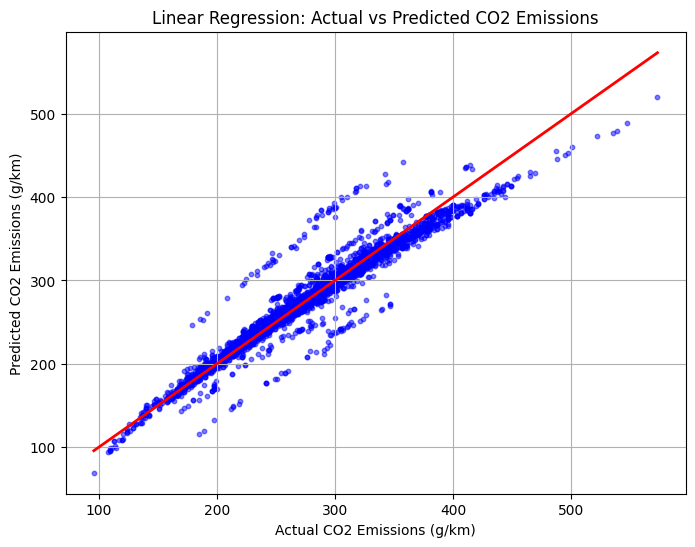

In [129]:
import matplotlib.pyplot as plt

# Convert y_test_5 to a NumPy array 
y_test_5_sample = np.array(y_test_5)
predictions_lr = linear_regression_model.predict(X_test_5)

# Plot the results: Actual vs Predicted (Linear Regression)

# Adjust the figure dimensions
plt.figure(figsize=(8, 6))
plt.scatter(y_test_5_sample, predictions_lr, color="blue", alpha=0.5,s=10)
plt.plot([y_test_5_sample.min(), y_test_5_sample.max()], [y_test_5_sample.min(), y_test_5_sample.max()], color="red", linewidth=2)

# Assign the title and labels for the plot
plt.title("Linear Regression: Actual vs Predicted CO2 Emissions")
plt.xlabel("Actual CO2 Emissions (g/km)")
plt.ylabel("Predicted CO2 Emissions (g/km)")
plt.grid(True)

# Save the figure in specified path
plt.savefig('C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\Linear Regression plot.png', dpi=300, bbox_inches='tight')


# Display the plot
plt.show()

In [130]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Obtain the pca loadings
loadings = pca.components_

# Create a DataFrame to to store PCA loadings for fuel type dummy variables
loadings_df = pd.DataFrame(loadings, columns=['Fuel type_E', 'Fuel type_X', 'Fuel type_Z'], index=['PCA_1', 'PCA_2'])

# Display the loadings
print(loadings_df)


       Fuel type_E  Fuel type_X  Fuel type_Z
PCA_1     0.022650    -0.709718     0.704122
PCA_2     0.953552    -0.196274    -0.228507


In [131]:
# Create a new DataFrame by dropping the specified columns that are not required for model training from fv_data_3
fv_data_3_reduced = fv_data_3.drop(columns=['Make', 'Model', 'Model year', 'CO2 rating', 'Smog rating'])

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Define the target variable and predictors for fv_data_3_reduced dataframe
X_3 = fv_data_3_reduced.drop(columns=['CO2 emissions (g/km)'])  # All other columns are predictors
y_3 = fv_data_3_reduced['CO2 emissions (g/km)']  # Target variable


# Split the data into training(80%) and testing(20%) sets for fv_data_3_reduced dataframe
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(random_state=42)


# FUnction to evaluate the Random Forest model 
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mse, rmse, r2


# Train the Random Forest model 
random_forest.fit(X_train_3, y_train_3)

# Compute the Random Forest model based on the metrics
print("\nEvaluation for Random forest model:")
rf_mse, rf_rmse, rf_r2 = evaluate_model(random_forest, X_test_3, y_test_3)
print(f"Random Forest - MSE: {rf_mse}, RMSE: {rf_rmse}, R²: {rf_r2}")



Evaluation for Random forest model:
Random Forest - MSE: 6.046023833988401, RMSE: 2.458866371722628, R²: 0.9984331606203378


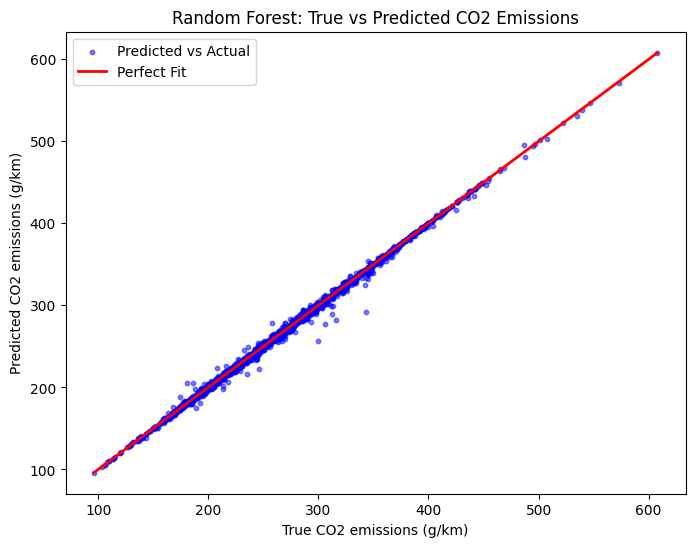

In [136]:
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred_rf = random_forest.predict(X_test_3)

# Scatter plot for True vs Predicted values(CO2 emissions g/km)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_3, y_pred_rf, color='blue', label='Predicted vs Actual',alpha=0.5,s=10)

# Plot the fitted line (perfect fit line x=y)
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], color='red', lw=2, label='Perfect Fit')

# Add labels and title
plt.xlabel('True CO2 emissions (g/km)')
plt.ylabel('Predicted CO2 emissions (g/km)')
plt.title('Random Forest: True vs Predicted CO2 Emissions')
plt.legend()

# Save the figure in specified path
plt.savefig('C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\RandomForest plot (untuned).png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for random forest model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV to find the best parameters using cross validation of 5 folds
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train_3, y_train_3)

# Find the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best parameters for Random Forest:", best_params)

# Train the Random Forest model with the best parameters
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_3, y_train_3)

# Evaluate the tuned Random Forest model
print("Evaluation for tuned Random Forest:")
rf_mse, rf_rmse, rf_r2 = evaluate_model(best_rf, X_test_3, y_test_3)
print(f"Random Forest - MSE: {rf_mse}, RMSE: {rf_rmse}, R²: {rf_r2}")


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Evaluation for tuned Random Forest:
Random Forest - MSE: 5.924107617396932, RMSE: 2.433948975923064, R²: 0.9984647554559555


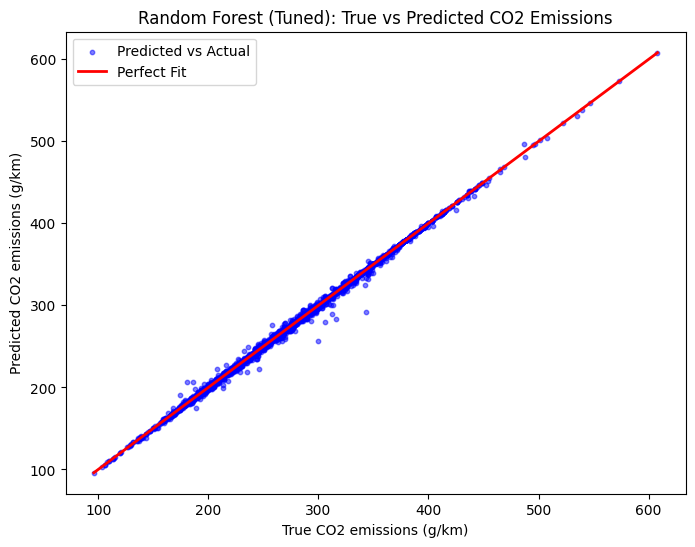

In [137]:
import matplotlib.pyplot as plt

# Generate predictions using the tuned Random Forest model
y_pred_best_rf = best_rf.predict(X_test_3)

# Scatter plot for True vs Predicted values(CO2 emissions g/km)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_3, y_pred_best_rf, color='blue', label='Predicted vs Actual',alpha=0.5,s=10)

# Plot the perfect line(x=y) for comparison
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], color='red', lw=2, label='Perfect Fit')

# Add labels and title
plt.xlabel('True CO2 emissions (g/km)')
plt.ylabel('Predicted CO2 emissions (g/km)')
plt.title('Random Forest (Tuned): True vs Predicted CO2 Emissions')
plt.legend()

# Save the figure in specified path
plt.savefig('C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\RandomForest plot (tuned).png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [138]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances of the variables from the tuned Random Forest model
feature_importances = best_rf.feature_importances_
feature_names = X_train_3.columns

# Create a DataFrame to store feature importances 
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort feature importance by descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance 
print(importance_df)



                Feature  Importance
9   Combined (L/100 km)    0.860173
10       Combined (mpg)    0.080666
12          Fuel type_E    0.049999
8    Highway (L/100 km)    0.003014
7       City (L/100 km)    0.001539
5       Engine size (L)    0.001307
14          Fuel type_Z    0.001170
13          Fuel type_X    0.000788
6             Cylinders    0.000357
0       Vehicle class_0    0.000326
4       Vehicle class_4    0.000219
3       Vehicle class_3    0.000171
1       Vehicle class_1    0.000163
2       Vehicle class_2    0.000057
11    Transmission type    0.000052


In [41]:

from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Remove the specified columns that are not required for modeling
fv_data_3_reduced = fv_data_3.drop(columns=['Make', 'Model', 'Model year', 'CO2 rating', 'Smog rating'])

# Standardize the numeric columns using standard scalar
numeric_features = ['Engine size (L)', 'Combined (L/100 km)', 'Combined (mpg)', 'City (L/100 km)', 'Highway (L/100 km)', 'Cylinders']
scaler = StandardScaler()
fv_data_3_reduced[numeric_features] = scaler.fit_transform(fv_data_3_reduced[numeric_features])

# Define the target variable and predictors
X_3 = fv_data_3_reduced.drop(columns=['CO2 emissions (g/km)'])  # All other columns are predictors
y_3 = fv_data_3_reduced['CO2 emissions (g/km)']  # Target variable

# Split the data into training(80%) and testing(20%) sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

# Initialize and fit the ElasticNet model with cross-validation of 5 folds
elastic_net_cv = ElasticNetCV(cv=5, random_state=42)
elastic_net_cv.fit(X_train_3, y_train_3)

# Predict CO2  emissions using the trained ElasticNet model
y_pred = elastic_net_cv.predict(X_test_3)

# Evaluate the ElasticNet model
mse = mean_squared_error(y_test_3, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_3, y_pred)

# Display the results
print(f"ElasticNet model - MSE: {mse}, RMSE: {rmse}, R²: {r2}")
print(f"Best alpha: {elastic_net_cv.alpha_}")
print(f"Best l1_ratio: {elastic_net_cv.l1_ratio_}")


ElasticNet - MSE: 203.22997033601516, RMSE: 14.255874941090608, R²: 0.9473325396337412
Best alpha: 0.11839228610192847
Best l1_ratio: 0.5


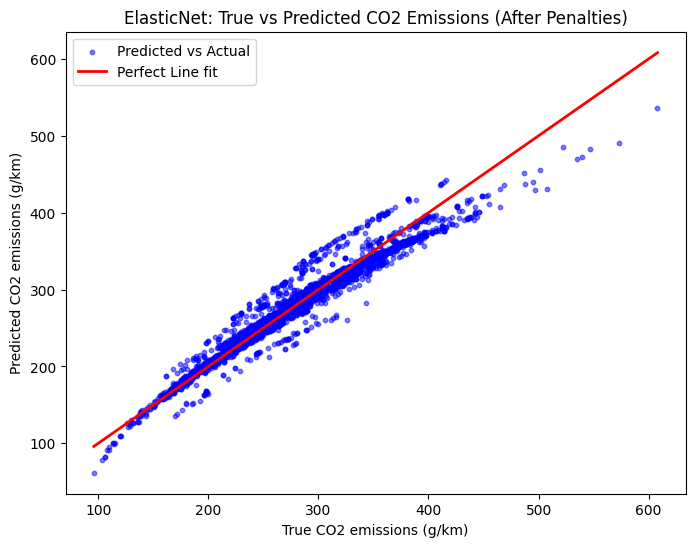

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import ElasticNet

# Fit ElasticNet model using the best parameters 
elastic_net_best = ElasticNet(alpha=elastic_net_cv.alpha_, l1_ratio=elastic_net_cv.l1_ratio_, random_state=42)
elastic_net_best.fit(X_train_3, y_train_3)

# Predict emissions for the test set
y_pred_best = elastic_net_best.predict(X_test_3)

# Scatter plot for True vs Predicted values(CO2 emissions g/km) after applying penalties
plt.figure(figsize=(8, 6))
plt.scatter(y_test_3, y_pred_best, color='blue', label='Predicted vs Actual',alpha=0.5,s=10)

# Plot the perfect line(x=y) for comparison
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], color='red', lw=2, label='Perfect Line fit')

# Add labels and title
plt.xlabel('True CO2 emissions (g/km)')
plt.ylabel('Predicted CO2 emissions (g/km)')
plt.title('ElasticNet: True vs Predicted CO2 Emissions (After Penalties)')
plt.legend()

# Save the figure in specified path
plt.savefig('C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\ElasticNet Plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [140]:
import pandas as pd

# Get the coefficients of the trained ElasticNet model
coefficients = elastic_net_cv.coef_

# Create a DataFrame to display the feature names and their corresponding coefficients
selected_features = pd.DataFrame({
    'Feature': X_train_3.columns,
    'Coefficient': coefficients
})

# Filter out features with coefficients equal to zero (remove the features with coefficient equal to zero)
selected_features = selected_features[selected_features['Coefficient'] != 0]

# Display the selected features and their respective coefficients
print("Selected Features and their Coefficients:")
print(selected_features)


Selected Features and their Coefficients:
                Feature  Coefficient
0       Vehicle class_0     2.367585
1       Vehicle class_1    -0.640121
2       Vehicle class_2    -0.022928
3       Vehicle class_3     3.595858
4       Vehicle class_4     0.184119
5       Engine size (L)     5.004116
6             Cylinders     9.306928
7       City (L/100 km)    12.455408
8    Highway (L/100 km)    11.680136
9   Combined (L/100 km)    12.376399
10       Combined (mpg)   -15.071517
11    Transmission type     1.021058
12          Fuel type_E   -31.694105
13          Fuel type_X     9.472566
14          Fuel type_Z    10.323773


In [142]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Define the target variable and predictors 
X = fv_data_3_reduced.drop(columns=['CO2 emissions (g/km)']) 
y = fv_data_3_reduced['CO2 emissions (g/km)']  # Target variable

# Split the data into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict emission on test set using traing xgboost model
y_pred = xgb_model.predict(X_test)

# Evaluate the xgboost model using the metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results obtained for xgboost model
print(f"XGBoost - MSE: {mse}, RMSE: {rmse}, R²: {r2}")



XGBoost - MSE: 5.596739077200684, RMSE: 2.365742817214222, R²: 0.9985495936793112


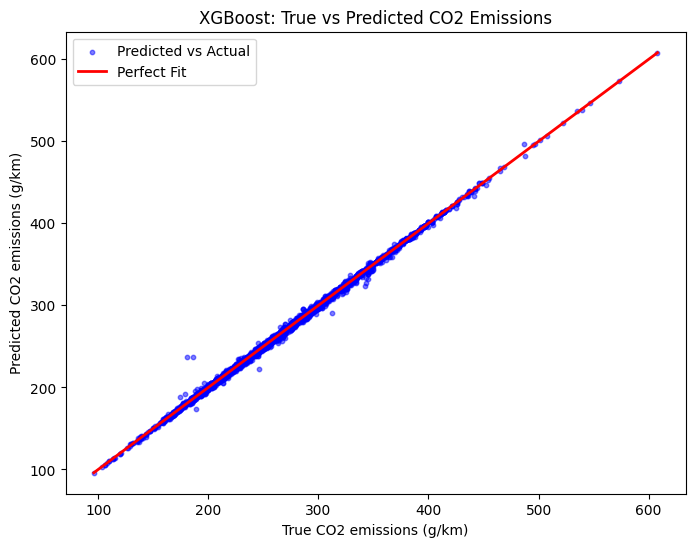

In [143]:
import matplotlib.pyplot as plt

# Scatter plot for True vs Predicted values(CO2 emissions g/km) using xgboost model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual',alpha=0.5,s=10)

# Plot the perfect line(x=y) for comparison
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')

# Add labels and title
plt.xlabel('True CO2 emissions (g/km)')
plt.ylabel('Predicted CO2 emissions (g/km)')
plt.title('XGBoost: True vs Predicted CO2 Emissions')
plt.legend()

# Save the figure in specified path
plt.savefig('C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\XGBoost plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [144]:
import xgboost as xgb

# Get feature importance scores for the xgboost model
importance = xgb_model.get_booster().get_score(importance_type='weight')

# Sort the featuresfrom highest to lowest importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Display the feature importance scores
print("Feature importance scores:")
for feature, score in sorted_importance:
    print(f"{feature}: {score}")


Feature importance scores:
City (L/100 km): 1067.0
Combined (L/100 km): 892.0
Highway (L/100 km): 876.0
Engine size (L): 746.0
Vehicle class_0: 169.0
Vehicle class_4: 155.0
Fuel type_X: 151.0
Vehicle class_1: 146.0
Vehicle class_2: 122.0
Fuel type_Z: 92.0
Vehicle class_3: 91.0
Fuel type_E: 90.0
Cylinders: 84.0
Transmission type: 79.0
Combined (mpg): 7.0


In [145]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# Define the target variable and predictors 
X = fv_data_3_reduced.drop(columns=['CO2 emissions (g/km)'])  # All other columns are predictors
y = fv_data_3_reduced['CO2 emissions (g/km)']  # Target variable

# Split the data into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for alpha and lambda
param_grid = {
    'reg_alpha': [0, 0.1, 0.5, 1, 10],  # L1 regularization parameter
    'reg_lambda': [0.1, 1, 5, 10, 20],  # L2 regularization parameter
    'max_depth': [3, 5, 7],             # max depth of the trees
    'n_estimators': [100, 200, 300],     # Number of trees in the model
    'learning_rate': [0.01, 0.05, 0.1]   # Learning rate
}

# Initialize GridSearchCV with cross-validation of 5 folds
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV on training set
grid_search.fit(X_train, y_train)

# Get the best parameters that are found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters for XGBoost:", best_params)

# Train the XGBoost model with the best parameters
best_xgb = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
best_xgb.fit(X_train, y_train)

# Predict CO2 emissions on test data using tuned xgboost model
y_pred = best_xgb.predict(X_test)

# Evaluate tuned xgboost model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results for tuned xgboost model
print(f"XGBoost (Tuned) - MSE: {mse}, RMSE: {rmse}, R²: {r2}")


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1}
XGBoost (Tuned) - MSE: 3.893875080387866, RMSE: 1.973290419676705, R²: 0.9989908943492517


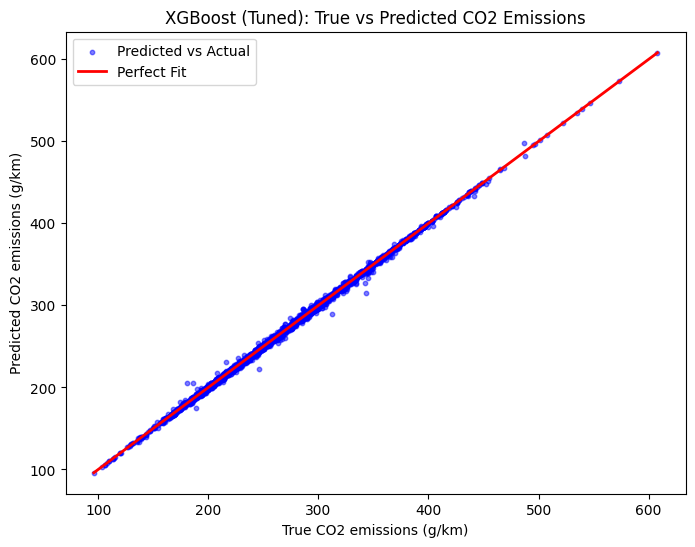

In [147]:
import matplotlib.pyplot as plt

# Generate predictions fot the tuned XGBoost model
y_pred_best_xgb = best_xgb.predict(X_test)

# Scatter plot for True vs Predicted values(CO2 emissions g/km) using xgboost model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_xgb, color='blue', label='Predicted vs Actual',alpha=0.5,s=10)

# Plot the perfect line(x=y) for comparison
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')

# Add labels and title
plt.xlabel('True CO2 emissions (g/km)')
plt.ylabel('Predicted CO2 emissions (g/km)')
plt.title('XGBoost (Tuned): True vs Predicted CO2 Emissions')
plt.legend()

# Save the figure in specified path
plt.savefig('C:\\Users\\HP\\Desktop\\dataset for dissertstion\\Graphs\\XGBoost plot(tuned).png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
